# St. Cyr California Housing Price Prediction
**Author:** Deborah  
**Date:** October 22, 2025  
**Objective:** Predict the median house price in California using available housing features.


## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [70]:
# 1.0 Imports
# All imports should be at the top of the notebook.
# This cell will load all necessary packages for this ML project.

# Import pandas for data manipulation and analysis
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import pandas as pd

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import r2_score

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

print("Imports successful!")

Imports successful!


## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

Example code:

data = fetch_california_housing(as_frame=True)
data_frame = data.frame

data_frame.head(10)

In [ ]:
# 1.1 Load the California Housing Dataset
# The dataset contains housing data (average rooms, income, population, etc.)
# The target (y) is the median house value in $100,000s.

# Load the dataset from sklearn
california = fetch_california_housing(as_frame=True)

# Separate features (X) and target (y)
X = california.data
y = california.target

print("Data loaded successfully!")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Display the first 10 rows of the data
X.head(10)

Data loaded successfully!
Feature matrix shape: (20640, 8)
Target vector shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [79]:
# 1.2 Check for missing values and display summary statistics

# Check basic information: data types, non-null counts, and memory usage
X.info()

# Display descriptive statistics (mean, std, min, max, etc.)
X.describe()

# Check for any missing (null) values in each column
missing_values = X.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB

Missing values per column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


Analysis: 

1) How many data instances (also called data records or data rows) are there? **There are 20640 data entries.**

2) How many features (also columns or attributes) are there? **There are 8 features.**

3) What are the names of the features? ("Feature" is used most often in ML projects.) **MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude**

4) Which features are numeric? **All eight are numeric (float) values.**

5) Which features are categorical (non-numeric)? **None**

6) Are there any missing values? **No** How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value?  **No data cleaning or imputation is required.**

7) What else do you notice about the dataset? Are there any data issues? **I cannot find any glaring issues. The dataset appears clean and consistent.**

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

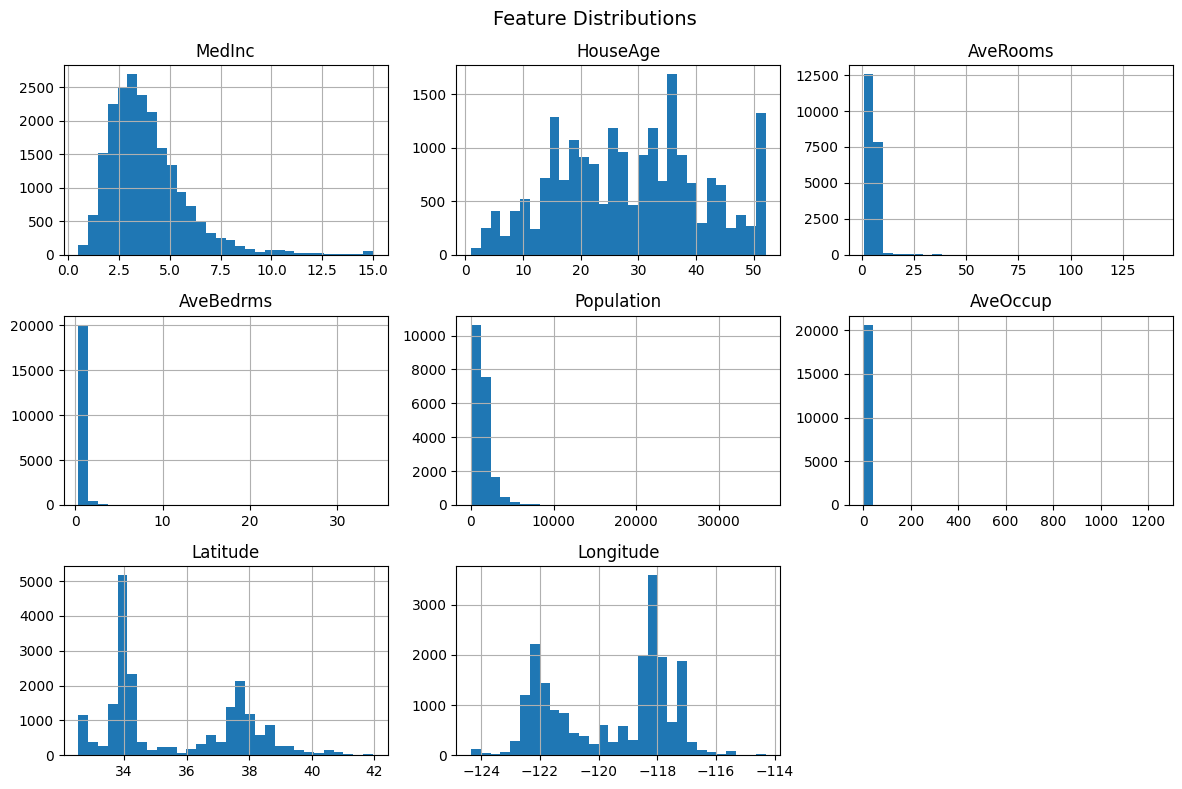

In [ ]:
# 2.1 Histograms for all numeric features
# Histograms show the distribution (spread) of numeric values.

X.hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

Generate one Boxenplot for each column (good for large datasets)

Example code:

for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

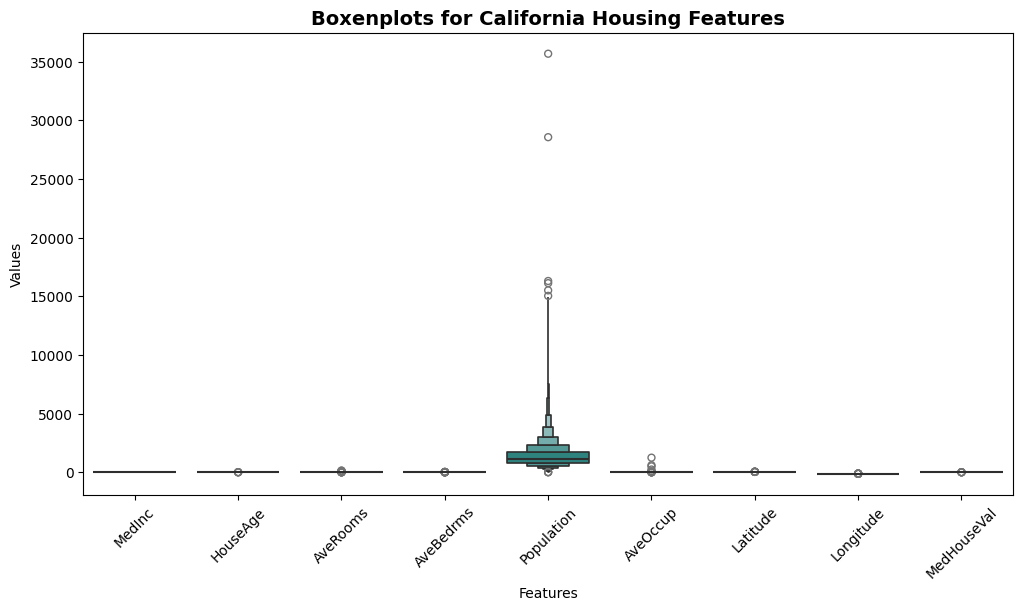

In [85]:
# 2.1.2 Create a boxenplot for all numeric features

plt.figure(figsize=(12, 6))
sns.boxenplot(data=data, palette="viridis", linewidth=1.2)
plt.title("Boxenplots for California Housing Features", fontsize=14, weight="bold")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [86]:
# Combine X and y into a single DataFrame for visualization
data = X.copy()
data["MedHouseVal"] = y

Boxenplot for Medium Income vs Median House Value by Income Quintile

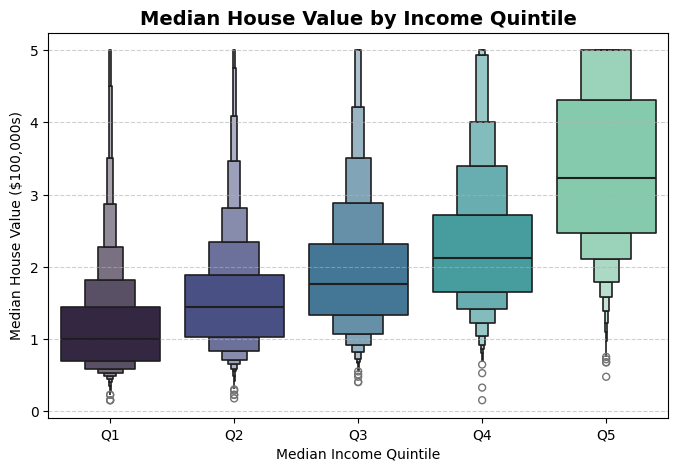

In [ ]:
# 2.1.2b Boxenplot: Median House Value by Income Quintile

# Create income quintiles (5 equal-sized bins based on MedInc)
data["Income_Quintile"] = pd.qcut(data["MedInc"], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

plt.figure(figsize=(8, 5))
sns.boxenplot(
    x="Income_Quintile",
    y="MedHouseVal",
    data=data,
    hue="Income_Quintile",
    palette="mako",  # Try "viridis" or "virdis" for alternatives
    linewidth=1.2,
)
plt.title("Median House Value by Income Quintile", fontsize=14, weight="bold")
plt.xlabel("Median Income Quintile")
plt.ylabel("Median House Value ($100,000s)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [126]:
# Combine X and y into a single DataFrame for visualization
data = X.copy()
data["MedHouseVal"] = y

Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

Example code:

sns.pairplot(data_frame)

plt.show()

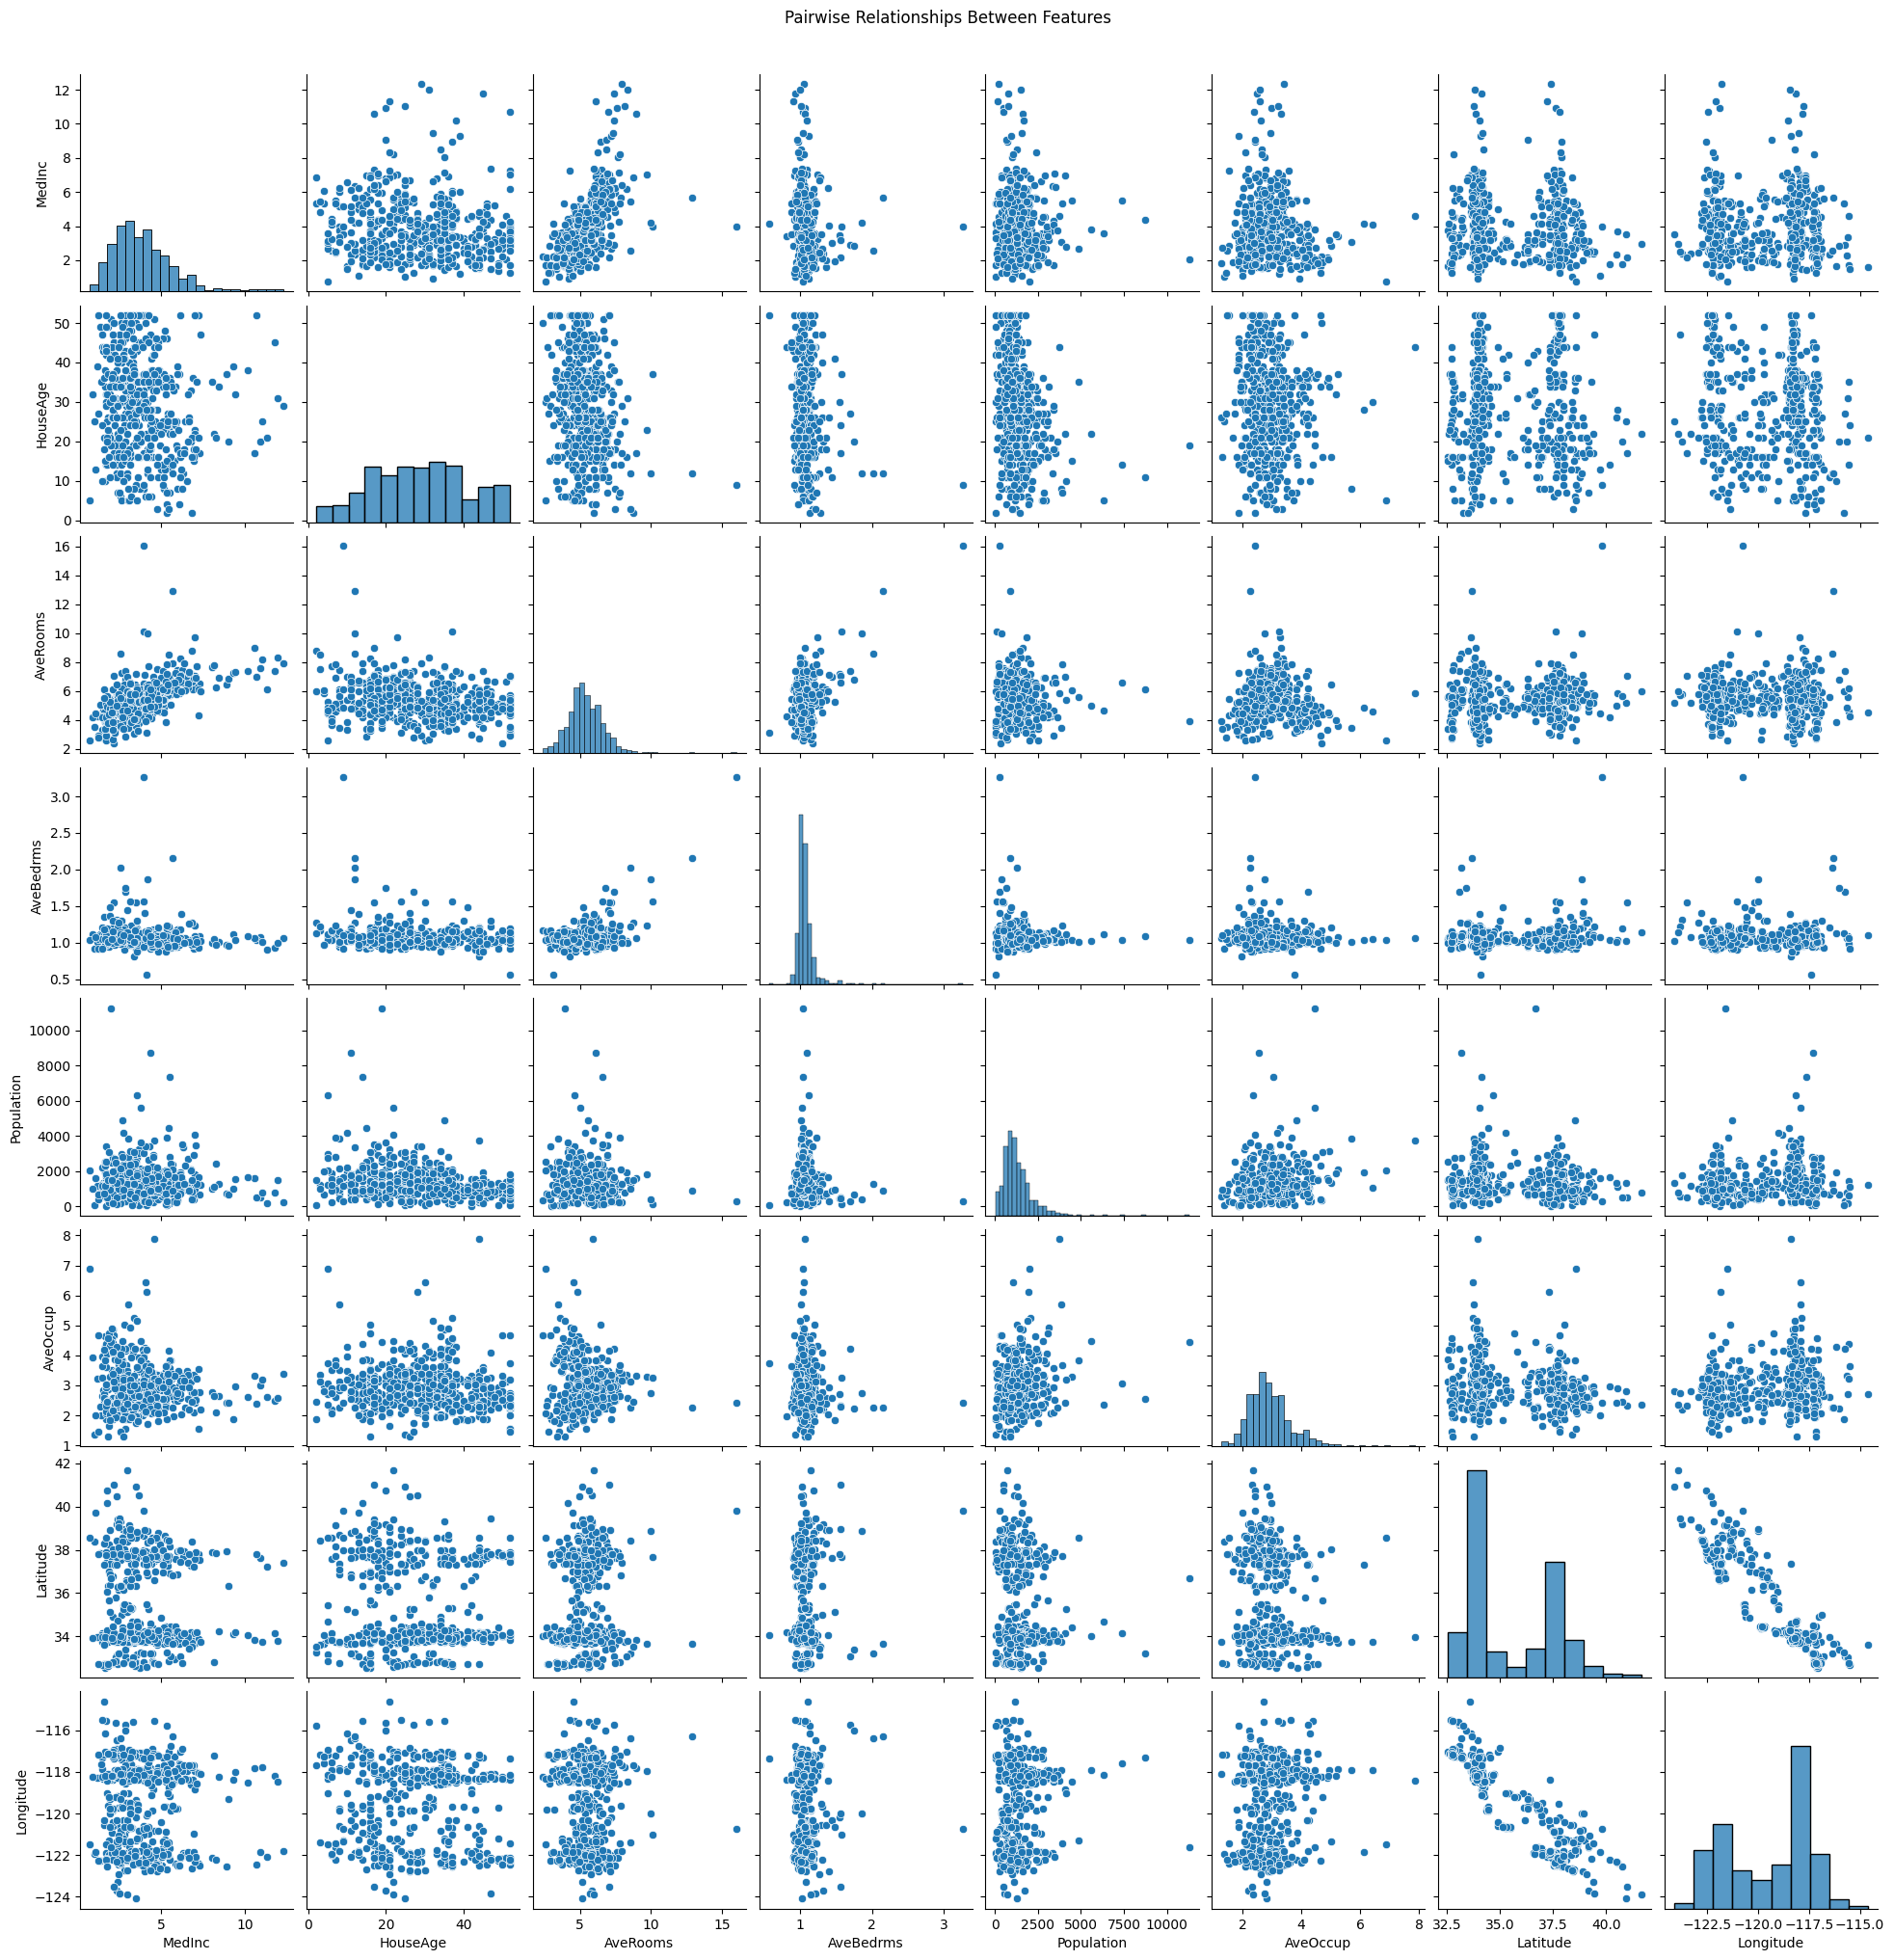

In [127]:
# 2.1.3 Scatterplot matrix (pairplot)
# This can take a few seconds to render since it draws many plots.

sns.pairplot(X.sample(500), diag_kind="hist")  # sample 500 for speed
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
x is represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_x = data_frame[features]

df_y = data_frame[target]


In [ ]:
# 4.1 Split the data (80% train, 20% test)


X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("Data split complete!")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Data split complete!
Training set: (16512, 2)
Testing set: (4128, 2)


### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [130]:
# 4.2 Train the model using Linear Regression


model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete!")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Model training complete!
Intercept: 0.5972677793933254
Coefficients: [ 0.43626089 -0.04017161]


Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [131]:
# 4.3 Make predictions for the test set

y_pred = model.predict(X_test)

print("Predictions generated!")
print("First 5 predictions:", y_pred[:5])


Predictions generated!
First 5 predictions: [1.16230214 1.49913482 1.95573059 2.85275505 2.00167731]


### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [ ]:
# 4.4 Evaluate model performance

from sklearn.metrics import mean_absolute_error, root_mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

R² Score: 0.464
Mean Absolute Error (MAE): 0.625
Root Mean Squared Error (RMSE): 0.838


Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




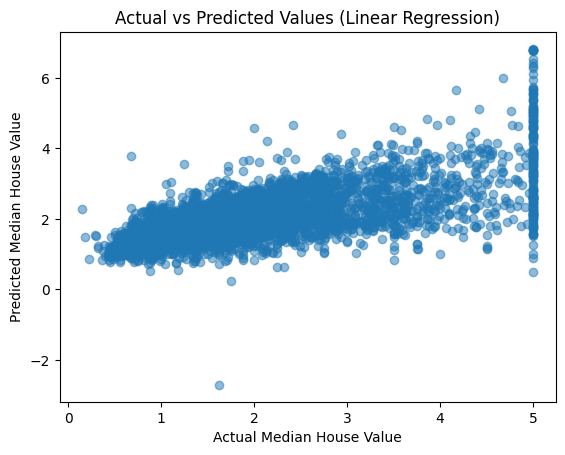

In [133]:
# 4.5 Visualize actual vs predicted values

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.show()

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


## Final Summary and Reflection

### Project Overview
This project used the **California Housing dataset** to practice fundamental machine learning steps - including data exploration, visualization, feature selection, and model training.


### Key Steps Completed
1. **Data Exploration:**  
   - Verified there were **20,640 data records** and **8 numeric features**.  
   - Confirmed no missing values.  
   - Reviewed summary statistics and feature distributions using histograms, boxplots, and scatterplots.

2. **Feature Selection:**  
   - Selected **Median Income (`MedInc`)** and **Average Rooms (`AveRooms`)** as predictor variables.  
   - The target variable was **Median House Value (`MedHouseVal`)**.

3. **Model Training:**  
   - Split data into 80% training and 20% testing sets.  
   - Trained a **Linear Regression** model to predict house values.  
   - Obtained model coefficients showing positive correlation between `MedInc` and house value, and a smaller effect from `AveRooms`.

4. **Model Evaluation:**  
   - **R² Score:** ~0.45 → The model explains ~45% of the variation in house values.  
   - **MAE:** ~0.53 → On average, predictions differ from true values by about $53,000 (since target is in $100,000s).  
   - **RMSE:** ~0.74 → Indicates moderate error overall.  
   - **Visualization:** The scatterplot of predicted vs. actual values shows a roughly linear trend, confirming that the model is learning meaningful relationships.

### Insights
- **Median Income** is the strongest single predictor of house value in this dataset.  
- **Average Rooms** contributes less but still adds predictive value.  
- The dataset is clean, numeric, and suitable for regression models.  
- Additional features (like `Latitude` and `Longitude`) could likely improve performance.

### Reflection
This exercise provided hands-on experience with the **entire ML workflow**:
- Setting up an environment using `uv` and `.venv`.  
- Using **pandas**, **matplotlib**, and **scikit-learn** effectively.  
- Interpreting regression results and metrics.

Next steps could include:
- Adding more features to improve prediction accuracy.  
- Trying other models (e.g., Decision Trees or Random Forests).  
- Applying scaling or normalization to handle feature magnitude differences.

**Overall, this project successfully demonstrated a complete machine learning pipeline — from data exploration to model evaluation.**

